# Simple Model Testing
This notebook aims to test the digital model in simple and isolated scenarios in order to validate that the implementation logic is following the correct assumptions of allocation (`get` and `put`) 

First things firts, Importing:

In [89]:
from dtwinpylib.dtwinpy.digital_model import Model

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.digital_model) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.digital_model' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\digital_model.py'>

## Multiple Queues to One Machine ( `get`)

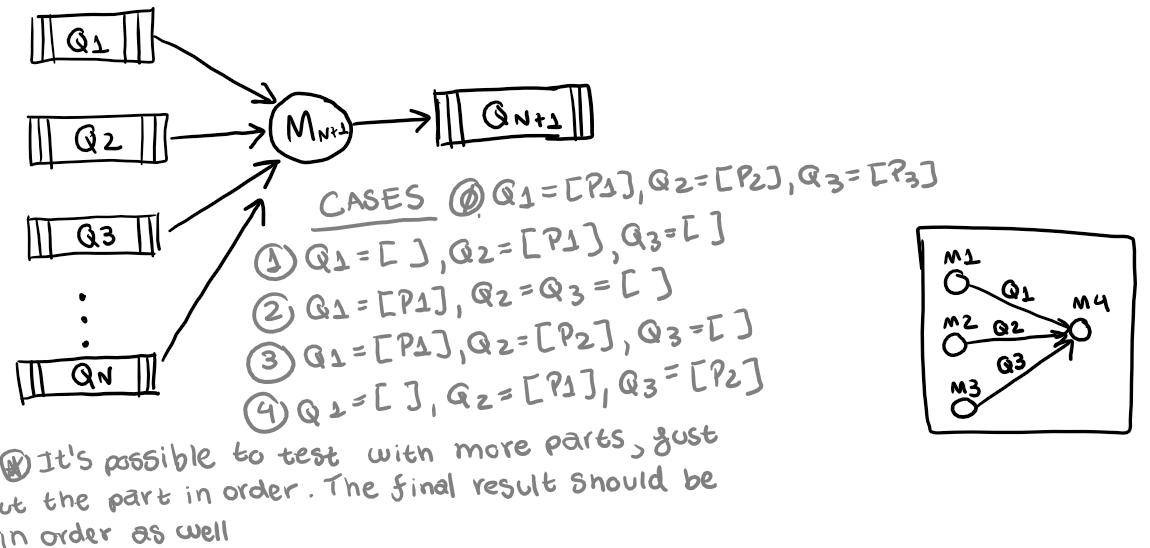

### Case 1: Q1 = [P1], Q2 = [P2], Q3 = [P3]

In [52]:
model_multiple2one_case1_path = "models/models_simple/models_multiple_one/model_case1.json"
database_multiple2one_case1_path = "databases/database_simple/database_multiple_one/database_case1.db"
model_multiple2one_case1 = Model(name= "model_case1",model_path= model_multiple2one_case1_path, database_path=database_multiple2one_case1_path, initial=True, loop_type= "open")
model_multiple2one_case1.model_translator()
model_multiple2one_case1.verbose()
model_multiple2one_case1.run()

==========  Reading the Model: model_case1  ==========
===> Big Picture
Total number of Machines: 4
Total number of Queues: 3

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 4]
Capacity: 10
Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [2, 4]
Capacity: 10
Parts stored: Part 2
Queue Lenght: 1
----------------
Queue 3
Arc links: [3, 4]
Capacity: 10
Parts stored: Part 3
Queue Lenght: 1

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
None
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
None
--Queue Out:--
Queue 3
----------------
> Machine 4
--Queue In:--
Queue 1
Queue 2
Queue 3
--Queue Out:--
None
### ============ Simulation Started ============ ###
Time: 0 - [Machine 4] got Part 1 from Queue 1 (capacity= 0)
Time: 100 - [Terminator] xxx Part 1 terminated xxx
Time: 100 - [Machine 4] got Part 2 from Queue 2 (capacity= 0)
Time: 2

From this simulation we should be apple to get the following configuration for the queues:

```
Queue 1
Arc links: [1, 4]
Capacity: 10
Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [2, 4]
Capacity: 10
Parts stored: Part 2
Queue Lenght: 1
----------------
Queue 3
Arc links: [3, 4]
Capacity: 10
Parts stored: Part 3
Queue Lenght: 1

```

And for the machines

```
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
None
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
None
--Queue Out:--
Queue 3
----------------
> Machine 4
--Queue In:--
Queue 1
Queue 2
Queue 3
--Queue Out:--
None
```
> **ghost stations:** A machine that doesn't have any queue In. This machine is just used to iniate the Queue Outs that will be the firsts queues in an Open Loop simulation.

As we can see we have 3 **ghost stations** (M1, M2, M3) in order to initiate the first Queues (Q1, Q2, Q3) that goes for the machine of the system (M4), which don't have any Out Queue becuase is the final machine of a Open Loop configuration
 

After running the simulation, you should be able to get the following results:

```
### ============ Simulation Started ============ ###
Time: 0 - [Machine 4] got Part 1 from Queue 1 (capacity= 0)
Time: 100 - [Terminator] xxx Part 1 terminated xxx
Time: 100 - [Machine 4] got Part 2 from Queue 2 (capacity= 0)
Time: 200 - [Terminator] xxx Part 2 terminated xxx
Time: 200 - [Machine 4] got Part 3 from Queue 3 (capacity= 0)
### ============ Simulation Done ============ ###
```

As we can see, eventhough all the queues have parts, the machine is choosing to take the parts following the numerical order of its Queue In. 

### Case 2: Q1=[1,2,3,4,5] Q2=[6,7] Q3=[8,9,10,11,12]

==========  Reading the Model: model_case2  ==========
===> Big Picture
Total number of Machines: 4
Total number of Queues: 3

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 4]
Capacity: 10
Parts stored: Part 1
Parts stored: Part 2
Parts stored: Part 3
Parts stored: Part 4
Parts stored: Part 5
Queue Lenght: 5
----------------
Queue 2
Arc links: [2, 4]
Capacity: 10
Parts stored: Part 6
Parts stored: Part 7
Queue Lenght: 2
----------------
Queue 3
Arc links: [3, 4]
Capacity: 10
Parts stored: Part 8
Parts stored: Part 9
Parts stored: Part 10
Parts stored: Part 11
Parts stored: Part 12
Queue Lenght: 5

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
None
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
None
--Queue Out:--
Queue 3
----------------
> Machine 4
--Queue In:--
Queue 1
Queue 2
Queue 3
--Queue Out:--
None
### ============ Simulation Started =====

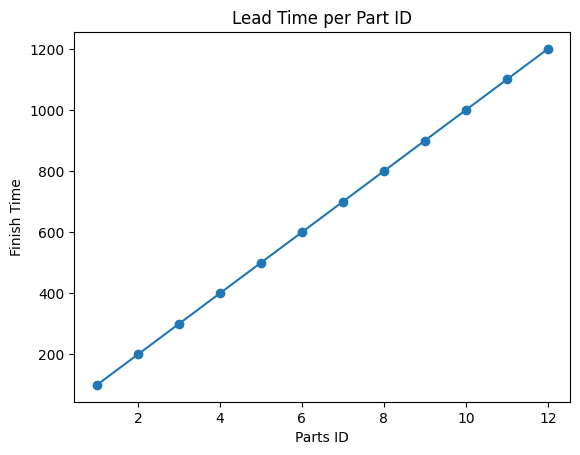

>>> *** SYSTEM THROUGHPUT: 0.01 [parts / time unit] ***


0.01

<Figure size 640x480 with 0 Axes>

In [58]:
model_multiple2one_case2_path = "models/models_simple/models_multiple_one/model_case2.json"
database_multiple2one_case2_path = "databases/database_simple/database_multiple_one/database_case2.db"
model_multiple2one_case2 = Model(name= "model_case2",model_path= model_multiple2one_case2_path, database_path=database_multiple2one_case2_path, initial=True, loop_type= "open")
model_multiple2one_case2.model_translator()
model_multiple2one_case2.verbose()
model_multiple2one_case2.run()
model_multiple2one_case2.analyze_results()

In this example the list of ID finished should be ascending, indicating that the machine first got all the parts from the first queue, and than second queue and so on...

### Case 3 Q1= [], Q2 = [1], Q3 = [2]

==========  Reading the Model: model_case3  ==========
===> Big Picture
Total number of Machines: 4
Total number of Queues: 3

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 4]
Capacity: 10
Queue Lenght: 0
----------------
Queue 2
Arc links: [2, 4]
Capacity: 10
Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 3
Arc links: [3, 4]
Capacity: 10
Parts stored: Part 2
Queue Lenght: 1

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
None
--Queue Out:--
Queue 2
----------------
> Machine 3
--Queue In:--
None
--Queue Out:--
Queue 3
----------------
> Machine 4
--Queue In:--
Queue 1
Queue 2
Queue 3
--Queue Out:--
None
### ============ Simulation Started ============ ###
Time: 0 - [Machine 4] got Part 1 from Queue 2 (capacity= 0)
Time: 100 - [Terminator] xxx Part 1 terminated xxx
Time: 100 - [Machine 4] got Part 2 from Queue 3 (capacity= 0)
Time: 200 - [Terminator] xxx

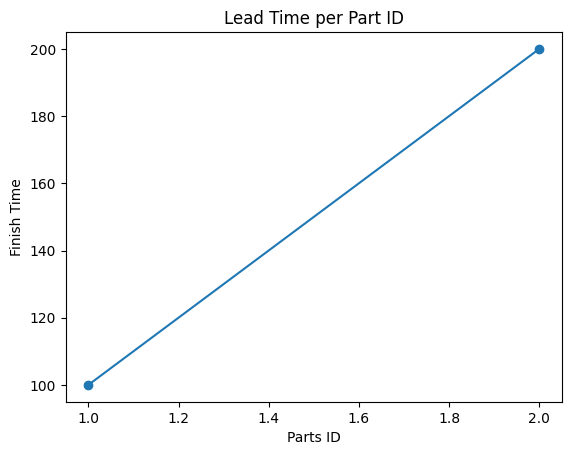

>>> *** SYSTEM THROUGHPUT: 0.01 [parts / time unit] ***


0.01

<Figure size 640x480 with 0 Axes>

In [72]:
model_path = "models/models_simple/models_multiple_one/model_case3.json"
database_path = "databases/database_simple/database_multiple_one/database_case3.db"
model = Model(name= "model_case3",model_path= model_path, database_path=database_path, initial=True, loop_type= "open")
model.model_translator()
model.verbose()
model.run()
model.analyze_results()

Case Simulink 1

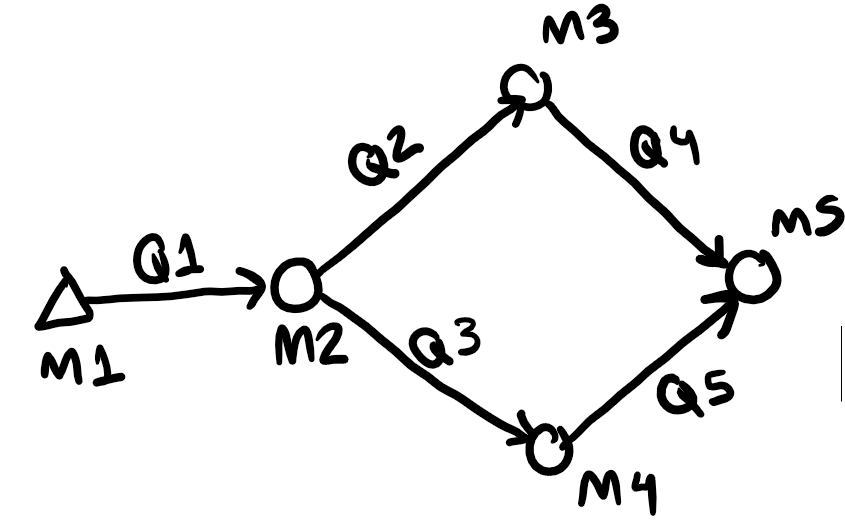

==========  Reading the Model: model_simulink1  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 100
Parts stored: Part 1
Parts stored: Part 2
Parts stored: Part 3
Parts stored: Part 4
Parts stored: Part 5
Parts stored: Part 6
Parts stored: Part 7
Parts stored: Part 8
Parts stored: Part 9
Parts stored: Part 10
Parts stored: Part 11
Parts stored: Part 12
Parts stored: Part 13
Parts stored: Part 14
Parts stored: Part 15
Parts stored: Part 16
Parts stored: Part 17
Parts stored: Part 18
Parts stored: Part 19
Parts stored: Part 20
Parts stored: Part 21
Parts stored: Part 22
Parts stored: Part 23
Parts stored: Part 24
Parts stored: Part 25
Parts stored: Part 26
Parts stored: Part 27
Parts stored: Part 28
Parts stored: Part 29
Parts stored: Part 30
Parts stored: Part 31
Parts stored: Part 32
Parts stored: Part 33
Parts stored: Part 34
Parts stored: Part 35
Parts stored: Part 36


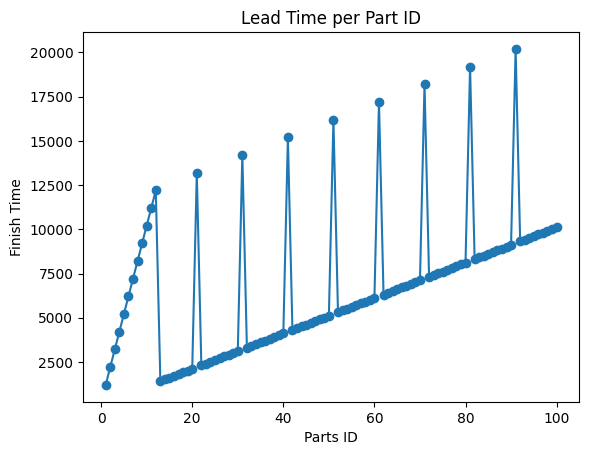

>>> *** SYSTEM THROUGHPUT: 0.0049504950495049506 [parts / time unit] ***


0.0049504950495049506

<Figure size 640x480 with 0 Axes>

In [91]:
model_path = "models/models_simple/models_multiple_one/model_simulink1.json"
database_path = "databases/database_simple/database_multiple_one/model_simulink1.db"
model = Model(name= "model_simulink1",model_path= model_path, database_path=database_path, initial=True, loop_type= "open")
model.model_translator()
model.verbose()
model.run()
model.analyze_results()

Simulink Model

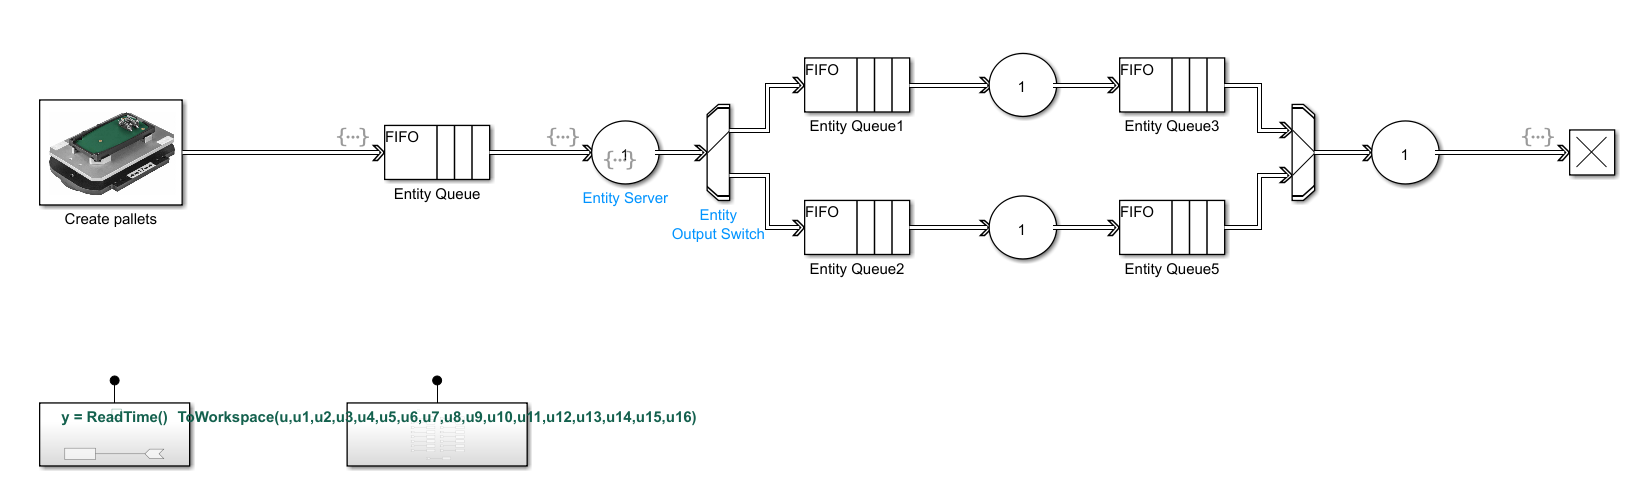

Comparing the order of finished workpieces

- dtwinpy 
```
List of IDs (AS IS): [5, 6, 7, 8, 9, 10, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4, 42, 43, 44, 45, 46, 47, 48, 49, 50, 11, 52, 53, 54, 55, 56, 57, 58, 59, 60, 21, 62, 63, 64, 65, 66, 67, 68, 69, 70, 31, 72, 73, 74, 75, 76, 77, 78, 79, 80, 41, 82, 83, 84, 85, 86, 87, 88, 89, 90, 51, 92, 93, 94, 95, 96, 97, 98, 99, 100, 61, 71, 81, 91]
```

- Simulink

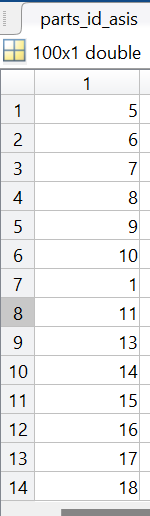

Using all the queues with the same capacity we got:

- dtwinpy:

```
List of IDs (AS IS): [1, 13, 14, 15, 16, 17, 18, 19, 20, 2, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3, 32, 33, 34, 35, 36, 37, 38, 39, 40, 4, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7, 72, 73, 74, 75, 76, 77, 78, 79, 80, 8, 82, 83, 84, 85, 86, 87, 88, 89, 90, 9, 92, 93, 94, 95, 96, 97, 98, 99, 100, 10, 11, 12, 21, 31, 41, 51, 61, 71, 81, 91]
```

- simulink

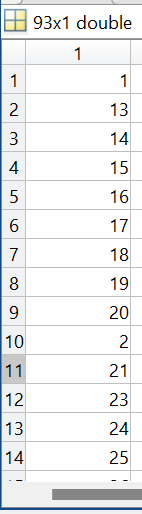

We can analyse the behaviour of the Queues. 10 means that the part with the line ID pass through that Queue, 1 means that the part didn't pass through that Queue.

- Queue 2 (upper queue and close to the slow machine)

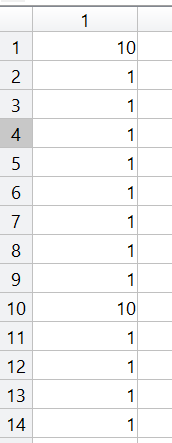

- Queue 3 (down queue, close to the fast machine)

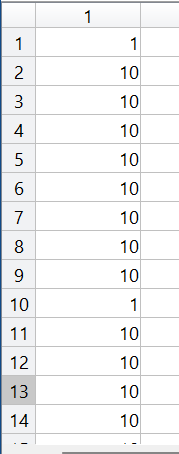



So as we can see, the policy between the 2 softwares are different. Dtwinpy put the part always in the **first queue available**, doesn't matter if the machine after that queue is block or not! Meanwhile, Simulink choose the queue in which the next machine is not working as a first priority (this is much more efficiente, but may be not represent the physical system). The Lego Factory has a higher chance to work like dtwinpy is working right now, because the system was projected to block according to the buffer capacity and not if the machine is busy or not. Futhermore, this choice will be part of the decision making that will follow the cycle time development

So as we can see simulink finished part 11 way faster than dtwinpy. One possible guess is that the simulink choice when it has 2 or more queues is not considering if the Queue is full, but actually considering if the machine connected to that queue is full! This is much more optmized, of course!

## One Machine to Multiple Queues

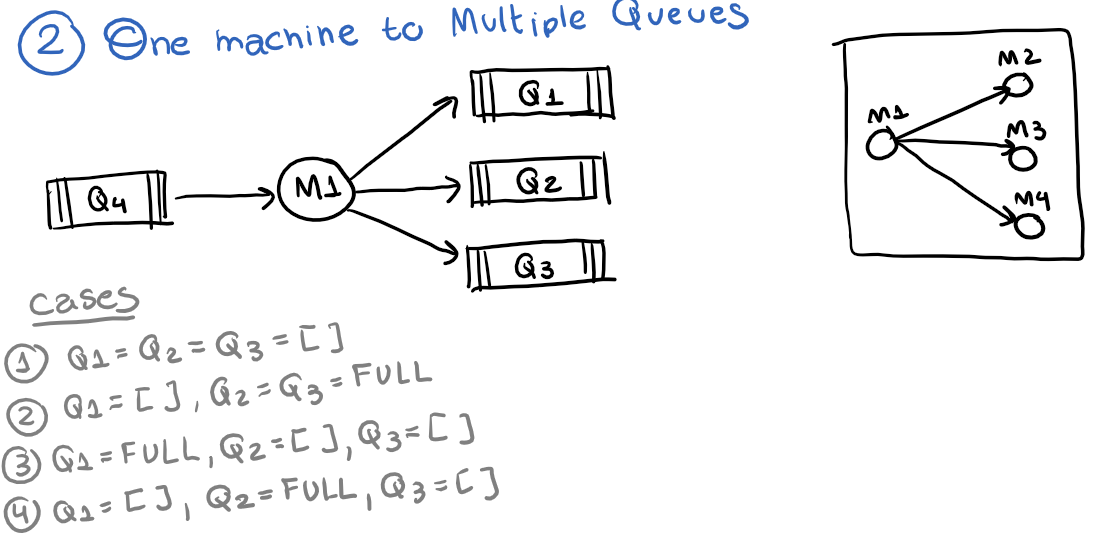

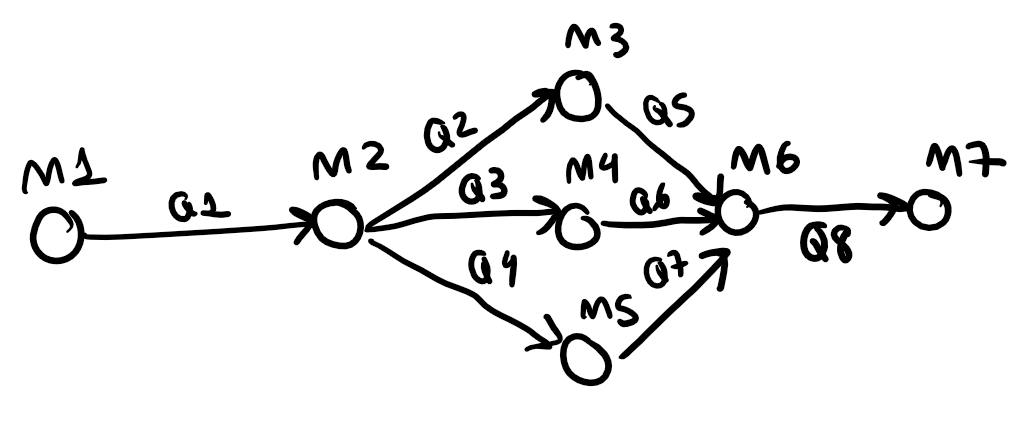

### Case 1: Q2 = Q3 = Q4 = 0

==========  Reading the Model: model_case3  ==========
===> Big Picture
Total number of Machines: 7
Total number of Queues: 8

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [1, 2]
Capacity: 10
Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [2, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [2, 4]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: [2, 5]
Capacity: 1
Queue Lenght: 0
----------------
Queue 5
Arc links: [5, 6]
Capacity: 1000
Queue Lenght: 0
----------------
Queue 6
Arc links: [4, 6]
Capacity: 1000
Queue Lenght: 0
----------------
Queue 7
Arc links: [3, 6]
Capacity: 1000
Queue Lenght: 0
----------------
Queue 8
Arc links: [6, 7]
Capacity: 1000
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
None
--Queue Out:--
Queue 1
----------------
> Machine 2
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Queue 4
----------------
> Machine 3
--Queue In:--
Queue 

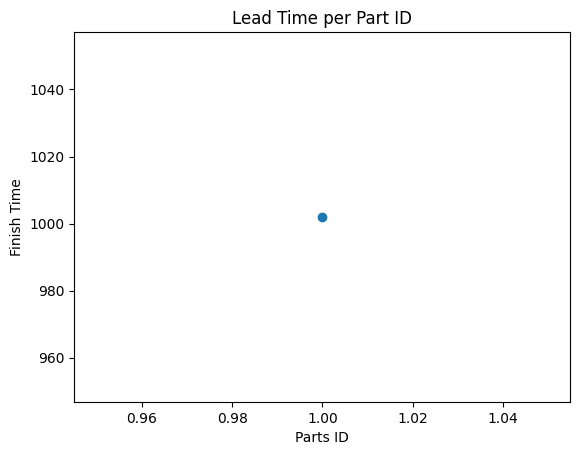

>>> *** SYSTEM THROUGHPUT: 0.000998003992015968 [parts / time unit] ***


0.000998003992015968

<Figure size 640x480 with 0 Axes>

In [74]:
model_path = "models/models_simple/models_one_multiple/model_case1.json"
database_path = "databases/database_simple/database_one_multiple/database_case1.db"
model = Model(name= "model_case3",model_path= model_path, database_path=database_path, initial=True, loop_type= "open")
model.model_translator()
model.verbose()
model.run()
model.analyze_results()

You should got this result:

```
### ============ Simulation Started ============ ###
Time: 0 - [Machine 2] got Part 1 from Queue 1 (capacity= 0)
Time: 1000 - [Machine 2] put Part 1 in Queue 2 (capacity = 1)
Time: 1000 - [Machine 3] got Part 1 from Queue 2 (capacity= 0)
Time: 1000 - [Machine 3] put Part 1 in Queue 7 (capacity = 1)
Time: 1001 - [Machine 6] got Part 1 from Queue 7 (capacity= 0)
Time: 1001 - [Machine 6] put Part 1 in Queue 8 (capacity = 1)
Time: 1002 - [Machine 7] got Part 1 from Queue 8 (capacity= 0)
Time: 1002 - [Terminator] xxx Part 1 terminated xxx
### ============ Simulation Done ============ ###
```

As we can Machine 2 choose the first Queue available **following the order given in mode.json file**

For example, here we can see that machine 3 put the Part actually in Queue 7. Why? Because in the model file that was the order :

```json
        {
            "arc": [
                2,
                5
            ],
            "capacity": 1,
            "frequency": 1,
            "contemp": 149
        },
        {
            "arc": [
                5,
                6
            ],
            "capacity": 1000,
            "frequency": 1000,
            "contemp": 149
        },   
 
```

So as we see, the link between 5 and 6 came first than the link between 3 and 6!

> **The "ERROR of 1 unit time":** Consider the following Machine 3 is waiting to finish the processing at 1000. Eventhoug it needs 0 to finish the simulation will continue to check the status of the other machines in the same time unit (1000). All the other machines don't have nothing to do because their Queue In is empty, be default they will wait 1 second until they check it again. After running all the other machines for T = 1000, the simulations starts checking again. When it reach M3 it puts the part in the next Queue. However, all the machines are waiting for 1 second. So the simulation advance 1 more second and starts checking all the machines that were waiting for something happen in T = 1001. This is the moment that M6 look again for the queues and get the part. **It's important to say that this error is not relevant when working with higher units of time because it's going to be always limitted between 1 or 2 unit of time (one for checking the Queue In and another one for checking the Queue Out)**